In [1]:
# import the data set and do the data preprocessing


In [2]:
#Problem statement
#Develop a sentiment analysis model to classify reviews as positive or negative. 
#Preprocess the review text using techniques such as lower casing, removing stop words amd lematization.
#use the trained model accurately predict the sentiment of new, unseen reviews.

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('Reviews.csv')


In [5]:
print(data)


                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [6]:
data


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [7]:
#we can review top 5 rows
data.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
#Top 10 rows
data.head(10)


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [9]:
#last 5 rows
data.tail()


,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [10]:
#last 10 rows
data.tail(10)


,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [11]:
data.info() # data set info like data types, entries of dataset, memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [12]:
#data cleaning


In [13]:
data.isnull().sum() # checking the null values


Review    0
Liked     0
dtype: int64

In [14]:
data.duplicated() # checking the duplicated values

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
from wordcloud import WordCloud

In [17]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
combined_text = " ".join(data['Review']) #combine all review text into one string

In [19]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

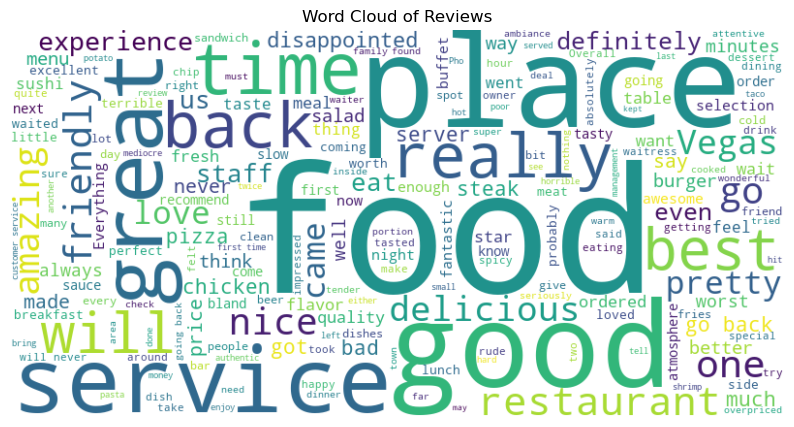

In [20]:
#plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear') #imshow for interpolation of wordcloud
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [21]:
from collections import Counter

In [22]:
targeted_words = ['good','great','amazing','bad']
all_words = " ".join(data['Review']).lower().split() #flatter reviews into a single list of words
word_counts = Counter(all_words)
target_word_count = {word: word_counts[word] for word in targeted_words}

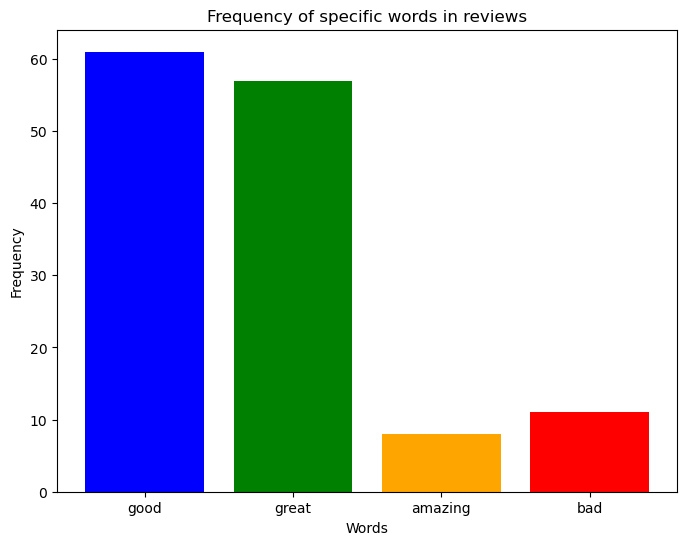

In [23]:
#plotting
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(),target_word_count.values(),color=['blue','green','orange','red'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in reviews')
plt.show()

In [24]:
#Text preprocessing

In [25]:
#converting a dataset into lower case
lowercased_text = data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [26]:
#tokenization => splitting the sentences or words
#tokenization is the process of breaking down a piece of text into smaller
from nltk.tokenize import word_tokenize

In [27]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
import nltk
from nltk.tokenize import word_tokenize

# Download the necessary resources for word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
data['Tokens'] = data['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [31]:
#Removing stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stop_words = set(stopwords.words('english'))

In [34]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stopwords.words('english')])

In [35]:
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [36]:
# drive, driving, drove, driven
#stemming
from nltk.stem import PorterStemmer

In [37]:
stemmer = PorterStemmer()

In [38]:
data['stemmed'] = data['Review'].apply(lambda x: " ".join([stemmer.stem(word) for word in word_tokenize(x)]))

In [39]:
print(data['stemmed'])

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: stemmed, Length: 1000, dtype: object


In [40]:
data['stemmed'].value_counts()

# name ?                                                                                                                               4
the food wa terribl .                                                                                                                  2
i would not recommend thi place .                                                                                                      2
i love thi place .                                                                                                                     2
i wo n't be back .                                                                                                                     2
                                                                                                                                      ..
omg , the food wa delicioso !                                                                                                          1
there is noth authent about thi place .  

In [41]:
#Lemmatization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [43]:
lemmatizer= WordNetLemmatizer()

In [44]:
data['Lemmatized'] = data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word,pos=wordnet.VERB) for word in word_tokenize(x)]))

In [45]:
print(data['Lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: Lemmatized, Length: 1000, dtype: object


In [46]:
#remove the numbers

import re
data['No_Numbers'] = data['Review'].apply(lambda x : re.sub(r'\d+',' ', x))

In [47]:
print(data['No_Numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [48]:
data['cleaned_text'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]',' ',x))

In [49]:
print(data['cleaned_text'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned_text, Length: 1000, dtype: object


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        1000 non-null   object
 1   Liked         1000 non-null   int64 
 2   Tokens        1000 non-null   object
 3   stemmed       1000 non-null   object
 4   Lemmatized    1000 non-null   object
 5   No_Numbers    1000 non-null   object
 6   cleaned_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [51]:
#the food is awesome @ xyz hotel
#Normalization => to convert text into standard format

import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)

In [52]:
pip install contractions

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [53]:
print(data['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object


In [54]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install typing

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install --upgrade typing-extensions

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
from emoji.core import *
from emoji.unicode_codes import *
import unicodedata
from typing import Any, Callable, Dict, Iterator, List, Optional, Tuple, Union
from typing_extensions import Literal, Match, TypedDict
from emoji import unicode_codes
from emoji.tokenizer import Token, EmojiMatch, EmojiMatchZWJ, EmojiMatchZWJNonRGI, tokenize, filter_tokens


In [58]:
#to remove emojis
import emoji
data['Emoji'] = data['Review'].apply(emoji.demojize)

In [59]:
print(data['Emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Emoji, Length: 1000, dtype: object


In [60]:
#Removing HTML tags
!pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable


In [61]:
# import warnings
# warnings.filterwarnings("ignore", message="The input looks more like a filename than markup.", category=UserWarning)
from bs4 import BeautifulSoup

In [62]:
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

#data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(str(x), 'html.parser').get_text())

C:\ProgramData\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [63]:
print(data['cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [64]:
#TF - IDF VECTORIZER
#TF = Term Frequency, IDF = Inverse Document Frequency
#it will convert collection of text data into matrix format

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Review']) #on the 'review' column data only, to convert it into matrix format


In [66]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [67]:
#Building machine learning Model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [68]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Review'])
y = data['Liked']

In [69]:
#splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
print(X_train,X_test,y_train,y_test)

  (0, 1527)	0.578582388550776
  (0, 1516)	0.5587881819736206
  (0, 2005)	0.45560954528848707
  (0, 1938)	0.20794801889277578
  (0, 1778)	0.3196494189359375
  (1, 711)	0.4193390530637025
  (1, 622)	0.4193390530637025
  (1, 1180)	0.3554925882290983
  (1, 613)	0.32026666852400937
  (1, 1471)	0.272554926639921
  (1, 62)	0.5164170315313602
  (1, 263)	0.27998403419950374
  (2, 1057)	0.5102287539842273
  (2, 1962)	0.48790050997574835
  (2, 699)	0.3031291394604372
  (2, 1618)	0.5102287539842273
  (2, 1571)	0.3198299691276987
  (2, 1938)	0.21704341786509082
  (3, 1723)	0.4538927163856403
  (3, 1852)	0.42838721919777234
  (3, 719)	0.30305480231081033
  (3, 1791)	0.3192733609259723
  (3, 821)	0.37508854376741335
  (3, 590)	0.33614831815132157
  (3, 1471)	0.29501353406759745
  :	:
  (797, 1796)	0.2155139089210878
  (798, 649)	0.34296597014320795
  (798, 787)	0.34296597014320795
  (798, 17)	0.34296597014320795
  (798, 406)	0.32369375609078
  (798, 18)	0.34296597014320795
  (798, 122)	0.342965970143

In [71]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [72]:
y_pred = model.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

In [74]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [75]:
# #predict sentiment for new review
# def predict_sentiment(new_review):
#     #preprocess the new review
#     cleaned_review = preprocess_text(new_review)
#     #vectorize the new review
#     X_new = vectorizer.transform([cleaned_review])
#     #predict the sentiment
#     return model.predict(X_new)[0]

# #new_reviews = input("Enter a review")

# new_reviews = [
#     "This restaurant has the best food!",
#     "I will never come here again. Terrible Service."
# ]
# for review in new_reviews:
#     sentiment = predict_sentiment(review)
#     sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
#     print(f"Review: '{review}'\nPredicted Sentiment :{sentiment_label}\n")

In [76]:
#Predection of new review
# def preprocess_review(review):
#     review = review.lower() #coverting lowercase
#     review = BeautifulSoup(review,"html.parser").get_text()
#     review = re.sub(f"[{string.punctuation}]"," ",review)
#     review = contractions.fix(review)
#     review = emoji.demojize(review)
#     tokens = word_tokenizer(review)
#     stop_words=set(stopwords.words('english'))
#     tokens = [word for word in tokens if word not in stop_words]
#     stemmer = PorterStemmer()
#     stemmed_tokens = [stemmer.stem(word) for word in tokens]
#     lemmtizer = WordNetLemmatizer()
#     lemmatized_tokens = [lemmatizer.lemmatize(word,pos = 'v') for word in tokens]
#     cleaned_review = ' '.join(lemmatized_tokens)
#     return cleaned_review
# #new review prediction
# new_review = input('Enter a review')
# cleaned_review = preprocess_review(new_review)
# new_review_vectorized = vectorizer.transform([cleaned_review])
# prediction = model.predict(new_review_vectorized)
# if prediction[0] == 1:
#     print("The review is predicted positive")
# else:
#     print("The review is predicted negative")

In [77]:
import re  
import string  
import contractions  
import emoji  
from bs4 import BeautifulSoup  
import nltk  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.naive_bayes import MultinomialNB  
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords  
from nltk.stem import PorterStemmer, WordNetLemmatizer  

# Prepare your nltk resources  
nltk.download('punkt')  
nltk.download('stopwords')  
nltk.download('wordnet')  

# Sample training data (add more varied examples)  
X_train = [  
    "I love this movie, it's fantastic!",  
    "This film was boring and too long.",  
    "What an amazing experience! I enjoyed every moment.",  
    "I did not like the plot; it was very dull.",  
    "The food was excellent at the restaurant.",  
    "I hated the service; it was the worst experience ever.",  
    "Absolutely fantastic, will come back for sure!",  
    "Not great, but not terrible either.",  
    "The atmosphere was pleasant, and I had a good time.",  
    "Awful experience, would not recommend.",  
    "I will never come here again. Terrible service.",  
    "The product did not work as expected. Very disappointing.",  
    "Highly recommend this place, trust me!",  
    "It was okay, neither good nor bad.",  
    "One of the best experiences I've ever had!",  
    "I almost walked out, it was that bad."  
]  
y_train = [  
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0,  # existing examples  
    0, 0, 1, 0, 1, 0  # new examples added  
]  # More negative examples to balance  

# Initialize the TF-IDF vectorizer  
vectorizer = TfidfVectorizer()  

# Fit the vectorizer with the training data  
X_train_vectorized = vectorizer.fit_transform(X_train)  

# Train your model with the vectorized training data  
model = MultinomialNB()  
model.fit(X_train_vectorized, y_train)  

# Preprocess review function  
def preprocess_review(review):  
    review = review.lower()  # Converting to lowercase  
    review = BeautifulSoup(review, "html.parser").get_text()  # Remove HTML tags  
    review = re.sub(f"[{string.punctuation}]", " ", review)  # Remove punctuation  
    review = contractions.fix(review)  # Expand contractions  
    review = emoji.demojize(review)  # Convert emojis to text  
    tokens = word_tokenize(review)  # Tokenize the review  
    stop_words = set(stopwords.words('english'))  # Set of stop words  
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words  
    stemmer = PorterStemmer()  
    lemmatizer = WordNetLemmatizer()  
    
    # Stemming and lemmatization  
    lemmatized_tokens = [lemmatizer.lemmatize(stemmer.stem(word), pos='v') for word in tokens]  
    cleaned_review = ' '.join(lemmatized_tokens)  # Join tokens back into a string  
    return cleaned_review  

# Function to predict sentiment of a new review  
def predict_sentiment(new_review):  
    cleaned_review = preprocess_review(new_review)  # Preprocess the input review  
    new_review_vectorized = vectorizer.transform([cleaned_review])  # Transform to vector  
    prediction = model.predict(new_review_vectorized)  # Make a prediction  
    
    return "The review is predicted as positive." if prediction[0] == 1 else "The review is predicted as negative."  

# Input a new review and get the prediction  
new_review = input('Enter a review: ')  
result = predict_sentiment(new_review)  
print(result)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Enter a review: I will never come here again. Terrible Service.
The review is predicted as negative.
